In [31]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
digits=load_digits()

In [8]:
digits.images.shape

(1797, 8, 8)

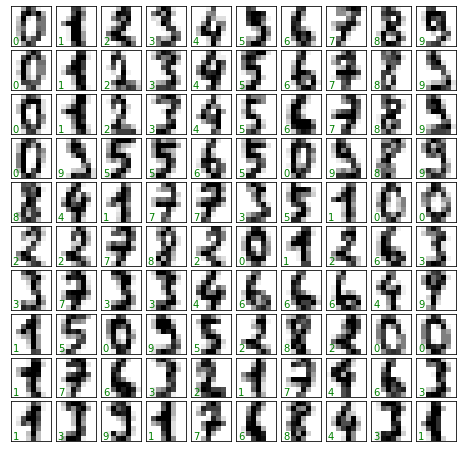

In [13]:
fig, axes = plt.subplots(10,10,figsize=(8,8), subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [14]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [15]:
from sklearn.manifold import Isomap

In [16]:
iso=Isomap(n_components=2)

In [19]:
iso.fit(X)
X.shape

(1797, 64)

In [18]:
data2=iso.transform(X)
data2.shape

(1797, 2)

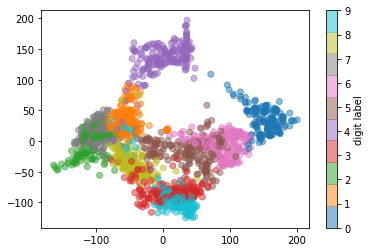

In [21]:
plt.scatter(data2[:,0],data2[:,1],c=digits.target, alpha=0.5,
           cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit label',ticks=range(10))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [23]:
from sklearn.naive_bayes import GaussianNB

In [25]:
model = GaussianNB()

In [26]:
model.fit(X_train,y_train)

GaussianNB()

In [27]:
y_model=model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8333333333333334

In [29]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_model)

Text(91.68, 0.5, 'Real Value')

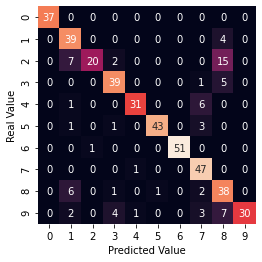

In [32]:
sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')